# Лабораторная работа №4: Частотный анализ формул численного интегрирования

Выполнили студенты гр. 2384 Федоров М.В. и Муравин Е.Е.

## Цель работы

Провести анализ частотных характеристик известных формул численного интегрирования.

## Основные теоретические положения

- Формула прямоугольников:

$$y_{n+1} = y_n + x_{n+\frac{1}{2}}, \quad y_0 = 0$$

- Формула трапеций:

$$y_{n+1} = y_n + \frac{1}{2} (x_{n} + x_{n+1}), \quad y_0 = 0$$

- Формула Симпсона:

$$y_{n+1} = y_{n-1} + \frac{1}{3} (x_{n-1} + 4x_{n} + x_{n+1}), \quad y_0 = 0$$

- Формула для интегрирования по «правилу 3/8»:

$$y_{n+2} = y_{n-1} + \frac{1}{8} (x_{n+2} + 3 x_{n+1} + 3 x_n + x_{n-1})$$

- Связь передаточной функции для круговой частоты и циклической:

$$H(w) = H(2 \pi f) = \tilde{H}(f)$$

- Отношение значений (оценка точности):

$$\gamma = \frac{calculated}{exact}$$


## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для различных квадратурных формул и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Получить формулы для передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам Ньютона-Котеса различного порядка. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных квадратурных формул.

## Выполнение работы

In [ ]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

## Задание 1
Вывести формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона. Построить графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства полученных передаточных функций.

### 1.1. Квадратурная формула прямоугольников

$$y_{n+1} = y_n + x_{n+\frac{1}{2}}$$
$$ x_n = e^{i\omega n}, y_n = H(\omega) e^{i\omega n} $$
$$ H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + e^{i\omega(n+\frac{1}{2})} $$
$$H(\omega)e^{i\omega} = H(\omega) + e^{i\omega/2} $$
$$H(\omega)(e^{i\omega} - 1) = e^{i\omega/2} $$
$$H(\omega) = \frac{e^{i\omega/2}}{e^{i\omega} - 1} = \frac{e^{i\omega/2}}{e^{i\omega/2}(e^{i\omega/2} - e^{-i\omega/2})} = \frac{1}{2i \sin(\omega/2)}$$
$$\gamma = \frac{y_n}{\int x_n \, dn}= \frac{i\omega}{2i \sin(\omega/2)} = \frac{\omega/2}{\sin(\omega/2)}$$

### 1.2. Квадратурная формула трапеций

$$y_{n+1} = y_n + \frac{1}{2}(x_n + x_{n+1})$$
$$ x_n = e^{i\omega n}, y_n = H(\omega) e^{i\omega n} $$
$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega n} + \frac{1}{2}(e^{i\omega n} + e^{i\omega(n+1)}) $$
$$H(\omega)(e^{i\omega} - 1) = \frac{1}{2}(1 + e^{i\omega}) $$

$$H(\omega) = \frac{1 + e^{i\omega}}{2(e^{i\omega} - 1)} = \frac{\cos(\omega/2)}{2i \sin(\omega/2)}$$

$$\gamma = \frac{\omega \cos(\omega/2)}{2 \sin(\omega/2)}$$

### 1.3. Квадратурная формула Симпсона

$$y_{n+1} = y_{n-1} + \frac{1}{3}(x_{n-1} + 4x_n + x_{n+1})$$

$$x_n = e^{i\omega n}, y_n = H(\omega) e^{i\omega n}$$

$$H(\omega)e^{i\omega(n+1)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{3}(e^{i\omega(n-1)} + 4e^{i\omega n} + e^{i\omega(n+1)})$$

$$H(\omega)(e^{i\omega} - e^{-i\omega}) = \frac{1}{3}(4 + e^{i\omega} + e^{-i\omega})$$

$$H(\omega)(2i \sin(\omega)) = \frac{1}{3}(4 + 2 \cos(\omega))$$

$$H(\omega) = \frac{2 + \cos(\omega)}{3i \sin(\omega)}$$

$$\gamma = \frac{\omega(2 + \cos(\omega))}{3 \sin(\omega)}$$

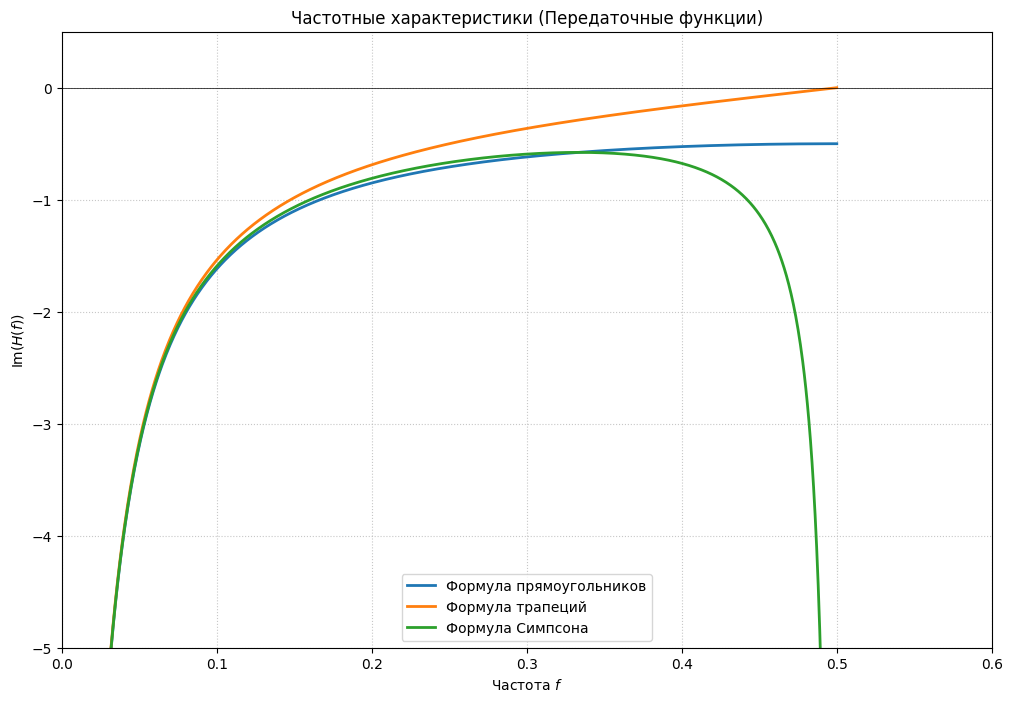

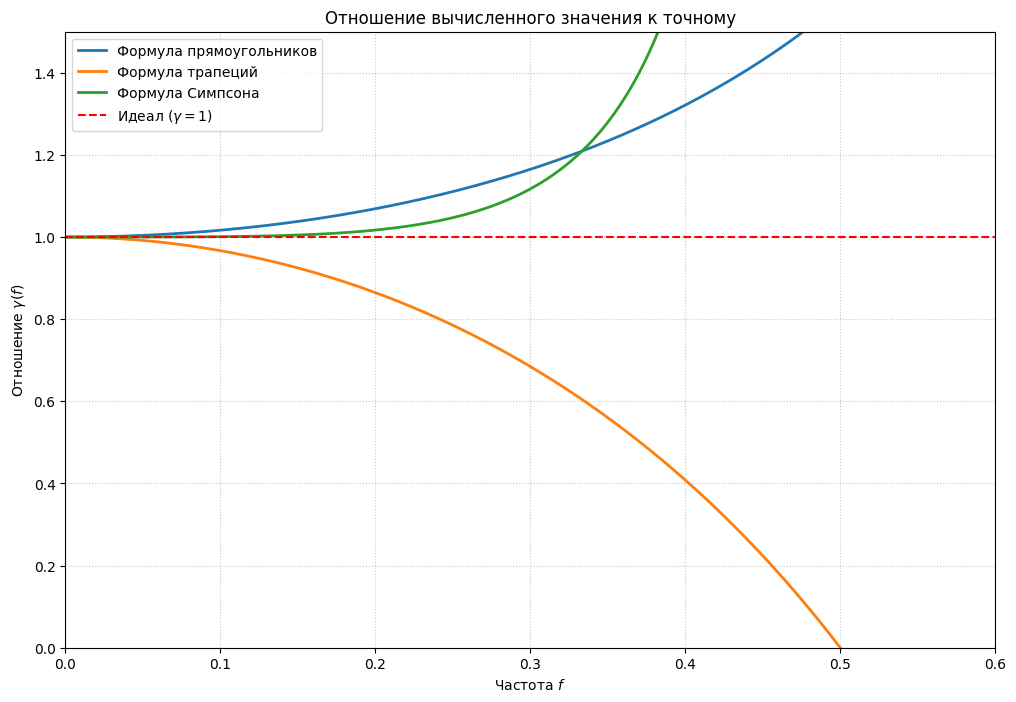

In [ ]:
f = np.linspace(0.001, 0.5, 1000)
omega = 2 * np.pi * f

H_rect = 1 / (2j * np.sin(omega / 2))
H_trap = np.cos(omega / 2) / (2j * np.sin(omega / 2))
H_simp = (2 + np.cos(omega)) / (3j * np.sin(omega))

plt.figure(figsize=(12, 8))
plt.plot(f, np.imag(H_rect), label='Формула прямоугольников', linewidth=2)
plt.plot(f, np.imag(H_trap), label='Формула трапеций', linewidth=2)
plt.plot(f, np.imag(H_simp), label='Формула Симпсона', linewidth=2)

plt.title('Частотные характеристики (Передаточные функции)')
plt.xlabel('Частота $f$')
plt.ylabel(r'$\mathrm{Im}(H(f))$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(-5, 0.5)
plt.xlim(0, 0.6)
plt.axhline(0, color='black', linewidth=0.5)
plt.show()


gamma_rect = (omega / 2) / np.sin(omega / 2)
gamma_trap = (omega * np.cos(omega / 2)) / (2 * np.sin(omega / 2))
gamma_simp = (omega * (2 + np.cos(omega))) / (3 * np.sin(omega))


plt.figure(figsize=(12, 8))
plt.plot(f, gamma_rect, label='Формула прямоугольников', linewidth=2)
plt.plot(f, gamma_trap, label='Формула трапеций', linewidth=2)
plt.plot(f, gamma_simp, label='Формула Симпсона', linewidth=2)

plt.axhline(1, color='red', linestyle='--', label=r'Идеал ($\gamma=1$)')

plt.title('Отношение вычисленного значения к точному')
plt.xlabel('Частота $f$')
plt.ylabel(r'Отношение $\gamma(f)$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(0, 1.5)
plt.xlim(0, 0.6)
plt.show()

Все три формулы демонстрируют, что $\mathrm{Im}(H(f)) \rightarrow -\infty$ при $f → 0$. Это поведение соответствует идеальному интегратору ($H(\omega)=\frac{1}{i\omega}=−i/\omega$), который должен иметь бесконечное усиление на нулевой частоте. Таким образом, все три метода ведут себя как фильтры нижних частот (ФНЧ), усиливающие низкие частоты.

На втором графике видно, что все три метода сходятся к $\gamma = 1$. Это означает, что для медленно меняющихся сигналов все три формулы обеспечивают высокую точность интегрирования.

Так же по графикам видно, что формула Симпсона обеспечивает лучшую точность среди всех методов. Ее график остается близки к значению $\gamma = 1$ (примерно до $f \approx 0.2$).

На высоких частотах все фильтры сильно подавляют сигнал, причем формула Симпсона подавляет сигнал сильнее остальных.

## Задание 2

Вывести формулу передаточной функции рекурсивного фильтра для интегрирования по «правилу 3/8»:

$$y_{n+2}=y_{n−1}+\frac{1}{8}(x_{n+2}+3x_{n+1}+3x_{n}+x_{n−1})$$

Построить график передаточной функции и график отношения вычисляемого в результате фильтрации значения к истинному. Проинтерпретировать частотные свойства передаточной функции.

$$y_{n+2} = y_{n-1} + \frac{1}{8}(x_{n+2} + 3x_{n+1} + 3x_n + x_{n-1})$$

$$x_n = e^{i\omega n}, y_n = H(\omega) e^{i\omega n}$$

$$H(\omega)e^{i\omega(n+2)} = H(\omega)e^{i\omega(n-1)} + \frac{1}{8}(e^{i\omega(n+2)} + 3e^{i\omega(n+1)} + 3e^{i\omega n} + e^{i\omega(n-1)})$$

$$H(\omega)e^{2i\omega} = H(\omega)e^{-i\omega} + \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

$$H(\omega)(e^{2i\omega} - e^{-i\omega}) = \frac{1}{8}(e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega})$$

$$H(\omega) = \frac{e^{2i\omega} + 3e^{i\omega} + 3 + e^{-i\omega}}{8(e^{2i\omega} - e^{-i\omega})} = \frac{2\cos(1.5\omega) + 6\cos(0.5\omega)}{16 i\sin(1.5\omega)}$$

$$\gamma = \frac{\omega(\cos(1.5\omega) + 3\cos(0.5\omega))}{8\sin(1.5\omega)}$$

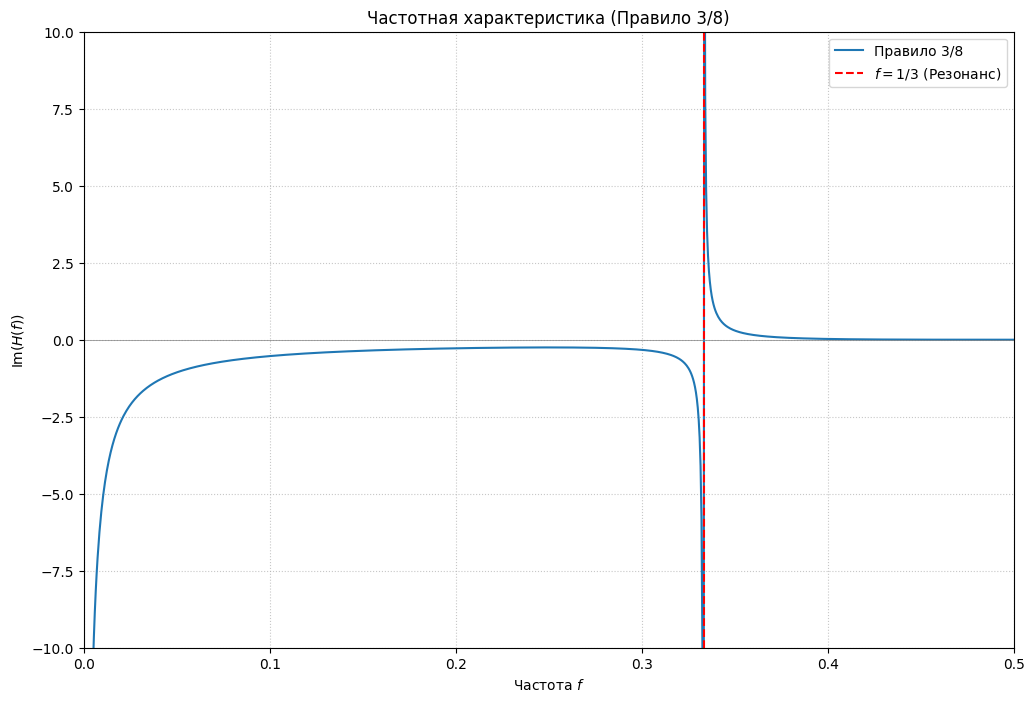

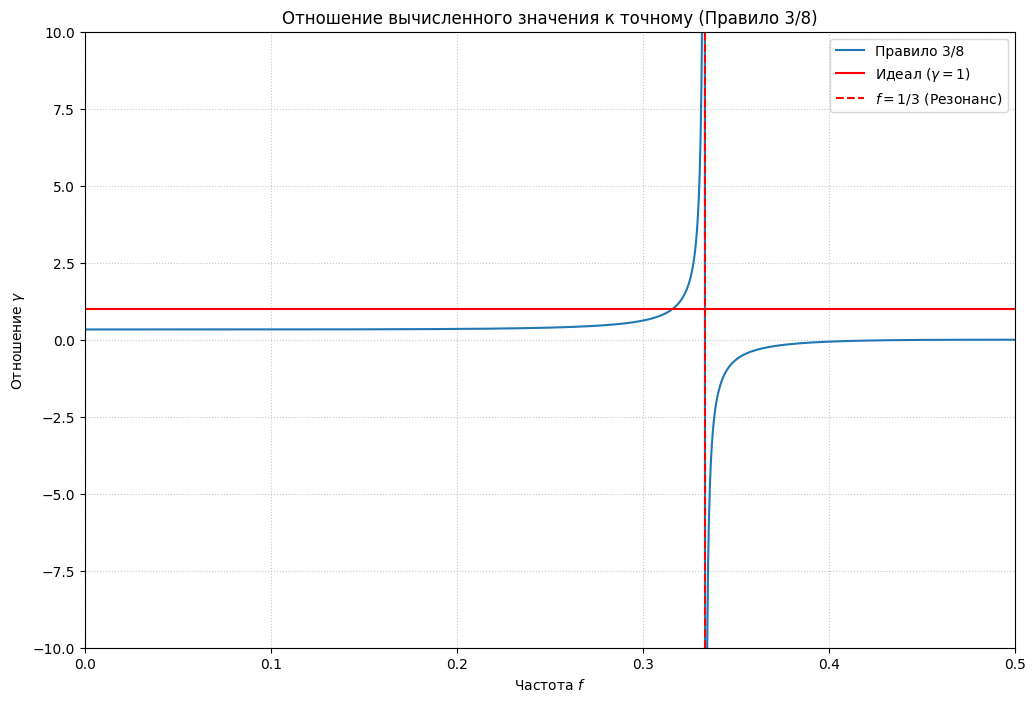

In [ ]:
f = np.linspace(0.001, 0.5, 1000)
omega = 2 * np.pi * f

H_3_8 = (
    (np.cos(1.5 * omega) + 3 * np.cos(0.5 * omega)) /
    (8j * np.sin(1.5 * omega))
)

plt.figure(figsize=(12, 8))
plt.plot(f, np.imag(H_3_8), label='Правило 3/8')
plt.title('Частотная характеристика (Правило 3/8)')
plt.xlabel('Частота $f$')
plt.ylabel(r'$\mathrm{Im}(H(f))$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(-10, 10)
plt.xlim(0, 0.5)
plt.axhline(0, color='grey', linewidth=0.5)
plt.axvline(x=1/3, color='red', linestyle='--', label='$f = 1/3$ (Резонанс)')
plt.legend()
plt.show()


gamma_3_8 = (
    (omega * (np.cos(1.5 * omega) + 3 * np.cos(0.5 * omega))) /
    (8 * np.sin(1.5 * omega))
)

plt.figure(figsize=(12, 8))
plt.plot(f, gamma_3_8, label='Правило 3/8')
plt.title('Отношение вычисленного значения к точному (Правило 3/8)')
plt.xlabel('Частота $f$')
plt.ylabel(r'Отношение $\gamma$')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.ylim(-10, 10)
plt.xlim(0, 0.5)
plt.axhline(1, color='red', linestyle='-', label=r'Идеал ($\gamma=1$)')
plt.axvline(x=1/3, color='red', linestyle='--', label='$f = 1/3$ (Резонанс)')
plt.legend()
plt.show()

Передаточная функция $\tilde{H}(f)$ показывает, что фильтр является интегратором нижних частот, т.к. его усиление растет при приближении частоты $f$ к нулю.

Однако особенностью этого фильтра является наличие резонанса при нормированной частоте $f = 1/3$. В этой точке $\sin(1.5\omega)$ в знаменателе обращается в ноль, и фильтр усиливает сигналы на этой частоте. Это делает его нестабильным. Так же видно, что рядом с асимптотой происходит усиление сигнала.

## Задание 3

Провести сопоставительный анализ частотных характеристик передаточных функций, полученных при выполнении п. 1 и 2.

В области низких частот амплитуды передаточных функций всех методов близки к идеальным значениям.

В области средних частот (СЧ) появляются различия:  
- метод прямоугольников слегка завышает амплитуду;
- метод трапеций даёт более стабильное, но немного заниженное значение;
- метод Симпсона сохраняет хорошее соответствие идеальному интегратору;
- метод 3/8 проявляет локальные участки усиления сигнала и искажения фазы.

На высоких частотах (ВЧ) различия усиливаются:
- метод прямоугольников слабо подавляет высокочастотные составляющие, что делает его наименее точным при шумных сигналах;
- метод трапеций обеспечивает наиболее плавное уменьшение амплитуды и стабильную работу;
- метод Симпсона также теряет устойчивость при $f \to 0.5$;
- у метода 3/8 наблюдается полюс при $f \approx 1/3$, где сигнал сильно искажается;

## Выводы

В ходе выполнения практической работы был проведен анализ частотных характеристик известных формул численного интегрирования, для этого были:

- выведены формулы передаточных функций рекурсивных фильтров, соответствующих квадратурным формулам прямоугольников, трапеций и Симпсона, рекурсивного фильтра для интегрирования «по правилу 3/8»

- построены графики передаточных функций и графики отношения вычисляемого в результате фильтрации значения к истинному

- проинтерпретированы частотные свойства полученных передаточных функций

Так же был проведен сравнительный анализ частотных характеристик всех передаточных функций, полученных при выполнении п. 1 и 2.